# Continuous Probability

In [15]:
# Not all distributions have a PDF.
def uniform_pdf(x: float, a: float, b: float):
    return 1/(b-a) if a <= x <= b else 0

In [16]:
# All distributions have a CDF.
def uniform_cdf(x: float, a: float, b: float):
    if x < a: return 0
    elif x < b: return (x-a)/(b-a)
    else: return 1

In [17]:
import numpy as np
from matplotlib import pyplot as plt

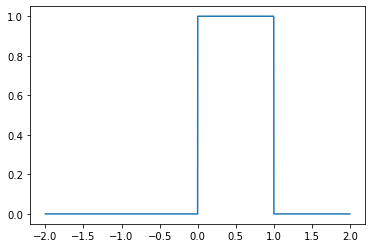

In [18]:
xs = np.arange(-2, 2, 0.001)
plt.plot(xs, [uniform_pdf(x, 0, 1) for x in xs])

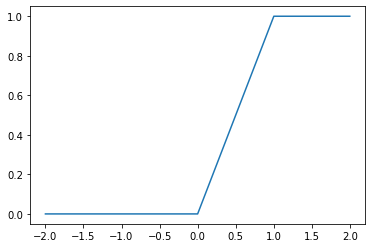

In [19]:
xs = np.arange(-2, 2, 0.001)
plt.plot(xs, [uniform_cdf(x, 0, 1) for x in xs])